In [2]:
import numpy as np
from scipy.linalg import eigh_tridiagonal
from numpy.random import randint, rand
from scipy.sparse import random
from matplotlib import pyplot as plt
import time

from lanczos import lanczos_eig

TypeError: Type Tuple cannot be instantiated; use tuple() instead

In [2]:
def rand_herm(size,sparsity):
    sparsity = 1 - np.sqrt(1 - sparsity)
    mat = np.zeros(size*size)
    nonzero_num = int(size*size*sparsity)
    nonzero_idx = randint(0, size**2, size=nonzero_num)
    mat[nonzero_idx] = rand(nonzero_num)
    mat = mat.reshape(size, size)
    mat = mat + mat.T
    return mat

In [3]:
def rand_herm_sparse(size,sparsity):
    sparsity = 1 - np.sqrt(1 - sparsity)
    mat = random(size,size,density=sparsity,format='csr')
    mat = mat + mat.T
    return mat

In [4]:
def LanczosVsNumpy(size, sparsity, k, repeats):
    tlanc_list = []
    teigh_list = []
    fidelity_list = []
    for idx in range(repeats):
        mat = rand_herm(size, sparsity)

        t0 = time.time()

        x = rand(size)
        _, W1 = lanczos_eig(mat,x,k)
        eiglanc = W1[:,0]

        t1 = time.time()

        _, W2 = np.linalg.eigh(mat)
        eigres = W2[:,0]

        t2 = time.time()

        fidelity = np.abs(eigres @ eiglanc)
        tlanc = t1 - t0
        teigh = t2 - t1
        
        fidelity_list.append(fidelity)
        tlanc_list.append(tlanc)
        teigh_list.append(teigh)
    
    return np.mean(tlanc_list), np.mean(teigh_list), np.mean(fidelity_list)

In [4]:
LanczosVsNumpy(1000, 0.2, 40, 100)

(0.03286337852478027, 0.2794663906097412, 0.9999744913435756)

In [ ]:
runtime_vals = []
for size_idx in range(300,1500,20):
    runtime_vals.append(LanczosVsNumpy(size_idx, 0.3, min(50+int(10*size_idx/1500),size_idx//10), 100))

In [8]:
# np.save('lanc_comp2.npy', np.array(runtime_vals))
runtime_vals = np.load('simdata/lanc_comp2.npy')

In [24]:
#qiskit colour palet
darkpurple = (48/255, 19/255, 94/255)
purple = (105/255, 40/255, 195/255)
background2 = (242/255, 243/255, 248/255)
background1 = (221/255, 225/255, 230/255)

In [ ]:
plt.rcParams['axes.facecolor']=background2

plt.figure(figsize=(21,9),dpi=300,facecolor=background1)
plt.plot(range(300,1500,20), np.array(runtime_vals)[:,0],'-o', markersize=1, linewidth=3,label='lanczos $|\ell \\rangle$',color=purple)
plt.plot(range(300,1500,20), np.array(runtime_vals)[:,1],'-o', markersize=1, linewidth=3,label='linalg.eigh $|e \\rangle$',color=darkpurple)
plt.xlabel('Array Dimension',fontsize=15)
plt.ylabel('Run Time',fontsize=15)
plt.title('$ \langle Run Time \\rangle_{100} $ vs Array Dimension',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('lanczos-vs-numpy-eigh.png',bbox_inches='tight')

In [ ]:
plt.rcParams['axes.facecolor']=background2
plt.figure(figsize=(21,9),dpi=300,facecolor=background1)

plt.plot(range(300,1500,20), np.array(runtime_vals)[:,2], color = purple)
plt.xlabel('Array Dimension')
plt.ylabel('Fidelity $\langle e | \ell \\rangle$')

In [16]:
def DenseVsSparse(size, sparsity, k, repeats):
    tdense_list = []
    tsparse_list = []
    fidelity_list = []
    for idx in range(repeats):
        matsp = rand_herm_sparse(size, sparsity)
        mat = matsp.A
        x1 = rand(size)
        x2 = x1.copy()
        
        t0 = time.time()

        _, W1 = lanczos_eig(mat,x1,k)
        eig_dense = W1[:,0]

        t1 = time.time()

        _, W2 = lanczos_eig(matsp,x2,k)
        eig_sparse = W2[:,0]

        t2 = time.time()

        fidelity = np.abs(eig_dense @ eig_sparse)
        tdense = t1 - t0
        tsparse = t2 - t1
        
        fidelity_list.append(fidelity)
        tdense_list.append(tdense)
        tsparse_list.append(tsparse)
    
    return np.mean(tdense_list), np.mean(tsparse_list), np.mean(fidelity_list)

In [17]:
DenseVsSparse(1000, 0.1, 40, 100)

(0.055108141899108884, 0.011468167304992677, 0.9999999999375276)

In [19]:
runtime_vals = []
for size_idx in range(300,1500,20):
    runtime_vals.append(DenseVsSparse(size_idx, 0.1, min(50+int(10*size_idx/1500),size_idx//10), 100))
runtime_vals = np.array(runtime_vals)

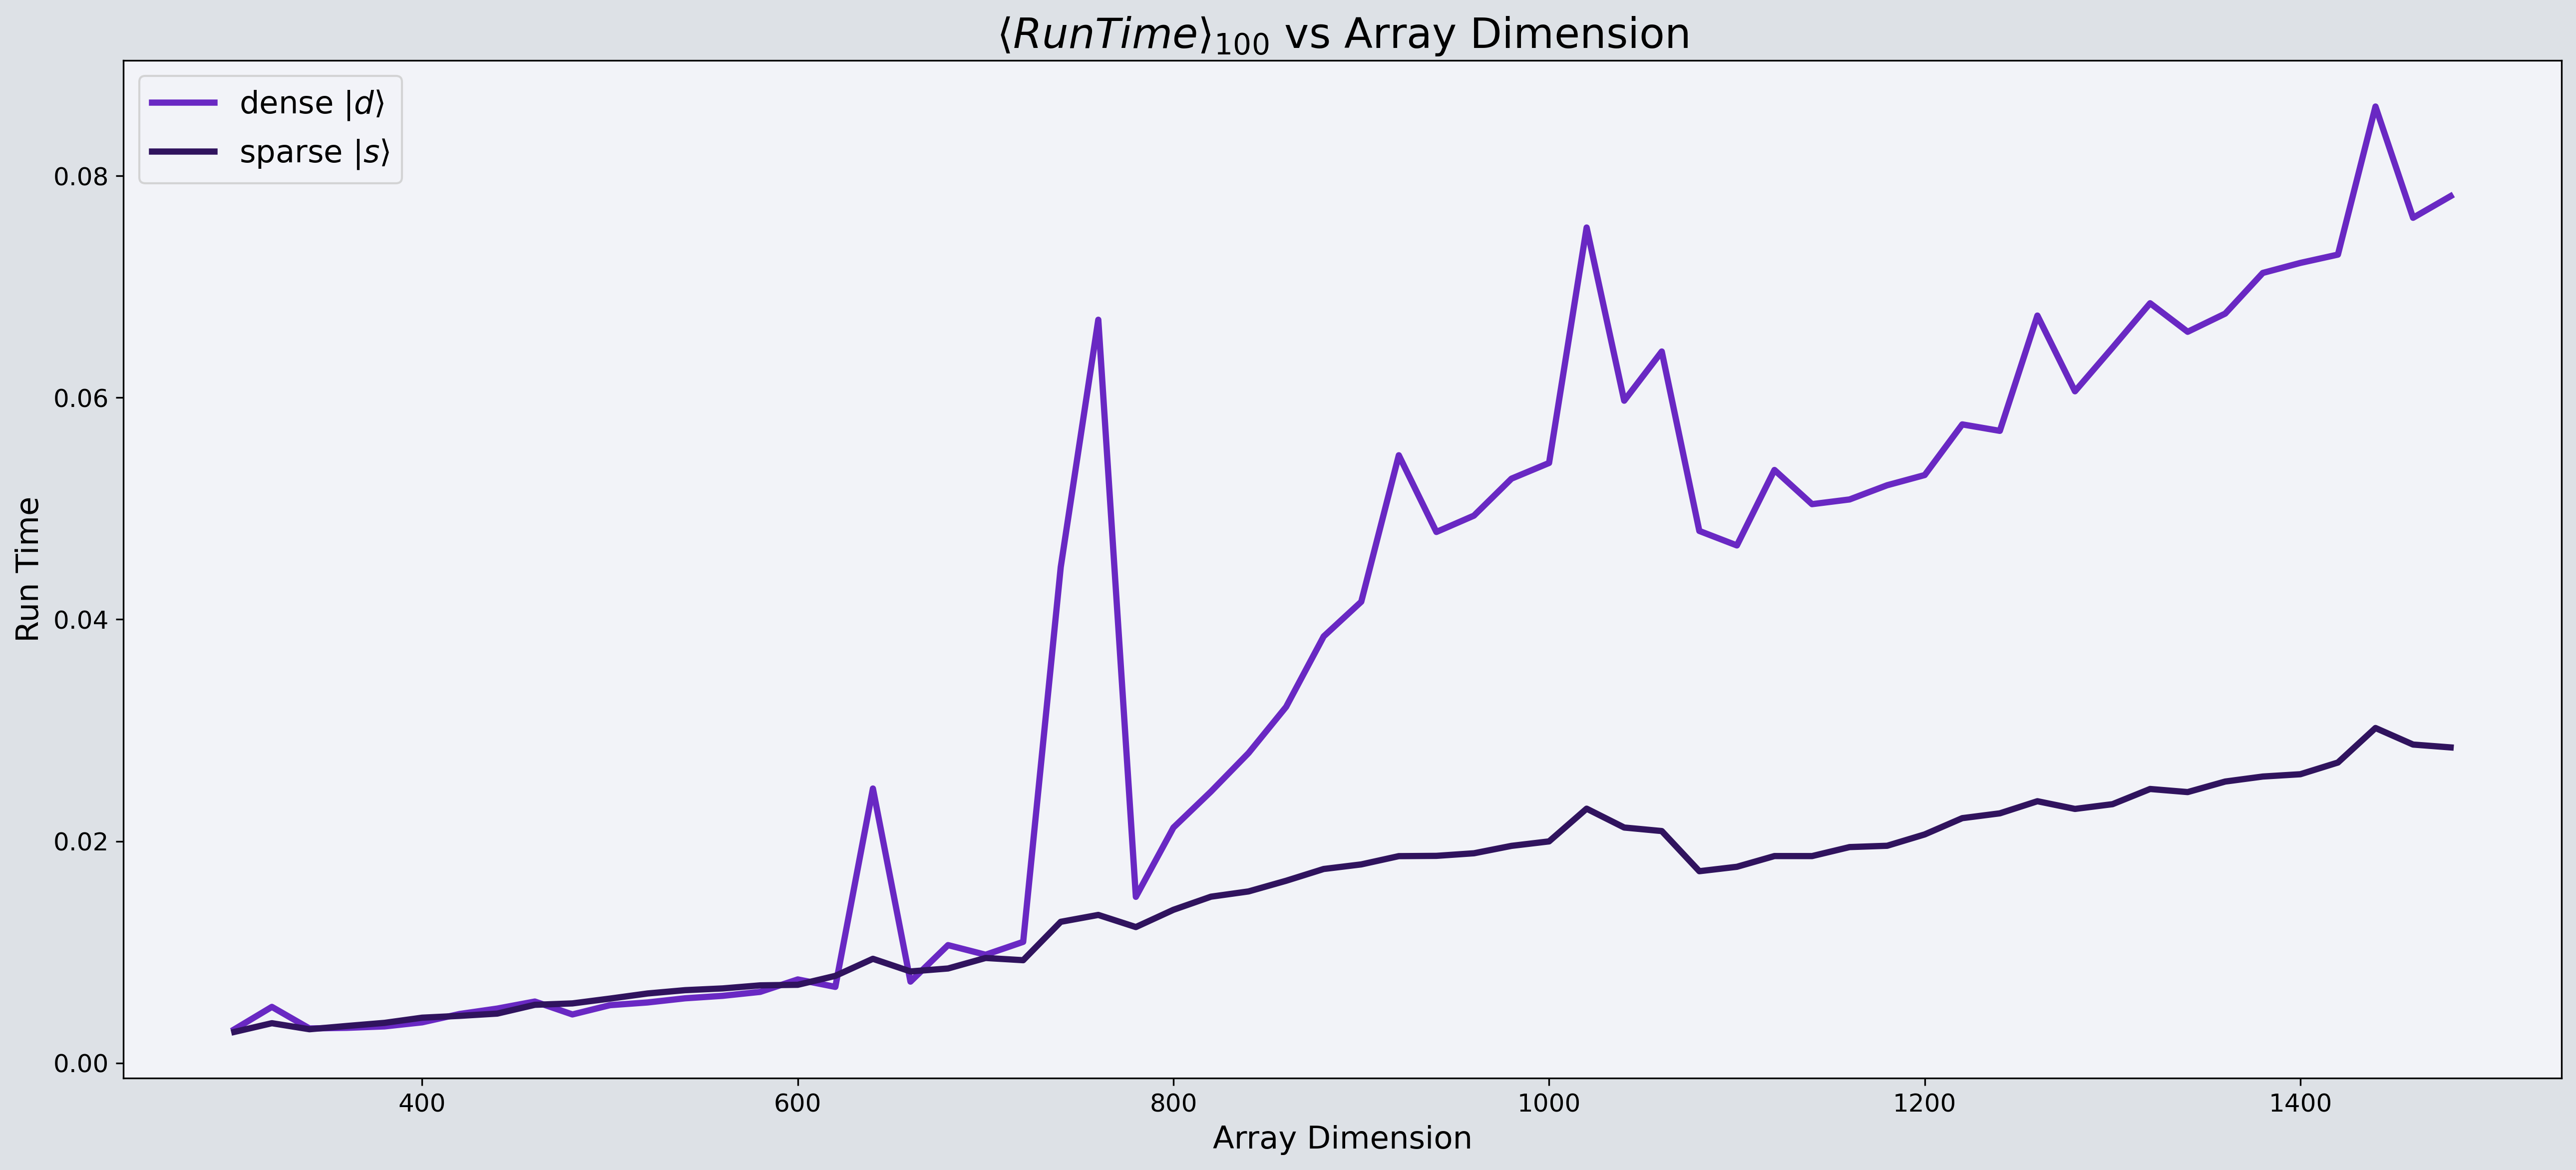

In [25]:
plt.rcParams['axes.facecolor']=background2

plt.figure(figsize=(21,9),dpi=300,facecolor=background1)
plt.plot(range(300,1500,20), np.array(runtime_vals)[:,0],'-o', markersize=1, linewidth=3,label='dense $|d \\rangle$',color=purple)
plt.plot(range(300,1500,20), np.array(runtime_vals)[:,1],'-o', markersize=1, linewidth=3,label='sparse $|s \\rangle$',color=darkpurple)
plt.xlabel('Array Dimension',fontsize=15)
plt.ylabel('Run Time',fontsize=15)
plt.title('$ \langle Run Time \\rangle_{100} $ vs Array Dimension',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.savefig('lanczos-vs-numpy-eigh.png',bbox_inches='tight')